# Hierarchical Clustering

## Importing the libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [37]:
def load_data(file_path):
  """
  Parameters:
  file_path (str): The path to the CSV file to load.
  Purpose:
  Load the dataset from a CSV file and return the feature matrix.
  Return:
  Optional[np.ndarray]: A NumPy array containing the feature matrix, or None if an error occurs.
  """

  try:
      dataset = pd.read_csv(file_path)
      X = dataset.iloc[:, 3:].values
      return X
  except Exception as e:
      print(f"Error loading data: {e}")
      return None

X = load_data('Mall_Customers.csv')

In [38]:
def print_samples(X, n_samples=5):
    """
    Parameters:
    X (np.ndarray): The feature matrix for clustering
    n_samples (int): The number of samples to print.
    Purpose:
    Print a sample of the dataset.
    Return:
    None
    """

    if X is not None:
        print("Sample of the dataset:")
        print(X[:n_samples])
    else:
        print("No data available to display.")

print_samples(X)


Sample of the dataset:
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


## Using the dendrogram to find the optimal number of clusters

{'icoord': [[15.0, 15.0, 25.0, 25.0], [35.0, 35.0, 45.0, 45.0], [20.0, 20.0, 40.0, 40.0], [5.0, 5.0, 30.0, 30.0], [55.0, 55.0, 65.0, 65.0], [85.0, 85.0, 95.0, 95.0], [115.0, 115.0, 125.0, 125.0], [105.0, 105.0, 120.0, 120.0], [90.0, 90.0, 112.5, 112.5], [75.0, 75.0, 101.25, 101.25], [60.0, 60.0, 88.125, 88.125], [17.5, 17.5, 74.0625, 74.0625], [145.0, 145.0, 155.0, 155.0], [135.0, 135.0, 150.0, 150.0], [165.0, 165.0, 175.0, 175.0], [195.0, 195.0, 205.0, 205.0], [185.0, 185.0, 200.0, 200.0], [170.0, 170.0, 192.5, 192.5], [142.5, 142.5, 181.25, 181.25], [45.78125, 45.78125, 161.875, 161.875], [225.0, 225.0, 235.0, 235.0], [215.0, 215.0, 230.0, 230.0], [255.0, 255.0, 265.0, 265.0], [245.0, 245.0, 260.0, 260.0], [222.5, 222.5, 252.5, 252.5], [285.0, 285.0, 295.0, 295.0], [275.0, 275.0, 290.0, 290.0], [315.0, 315.0, 325.0, 325.0], [305.0, 305.0, 320.0, 320.0], [282.5, 282.5, 312.5, 312.5], [237.5, 237.5, 297.5, 297.5], [335.0, 335.0, 345.0, 345.0], [355.0, 355.0, 365.0, 365.0], [340.0, 340.

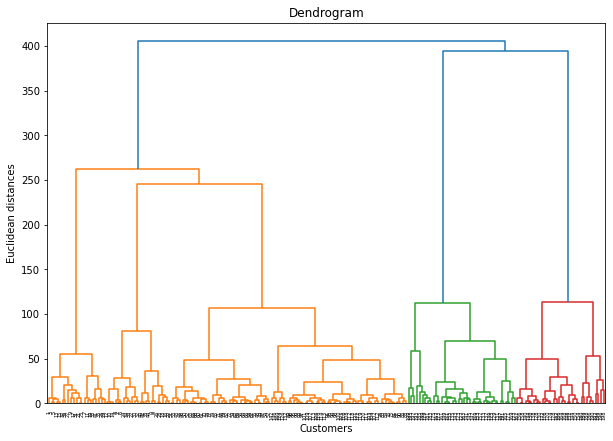

In [41]:
def plot_dendrogram(X, method='ward'):
    """
    Parameters:
    X (np.ndarray): The feature matrix for clustering.
    method (str): The linkage method to use for hierarchical clustering.
    Purpose:
    Calculate and plot the dendrogram for hierarchical clustering.
    Return:
    None
    """
    import scipy.cluster.hierarchy as sch
    plt.figure(figsize=(10, 7))
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    print(dendrogram)
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()

plot_dendrogram(X)

## Training the Hierarchical Clustering model on the dataset

In [48]:
def train_agglomorate_cluster(X, n_clusters=5, affinity = 'euclidean', linkage = 'ward'):
    """
    Parameters:
    X (np.ndarray): The feature matrix for clustering.
    n_clusters (int): The number of clusters to form.
    affinity (str): The metric used to compute the linkage.
    linkage (str): The linkage criterion to use.
    Purpose:
    Train the Agglomerative Clustering model and predict cluster labels.
    Return:
    Optional[np.ndarray]: An array of cluster labels, or None if an error occurs.
    """

    try:
        from sklearn.cluster import AgglomerativeClustering
        hc = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
        y_hc = hc.fit_predict(X)
        return y_hc
    except Exception as e:
        print(f"Error in clustering: {e}")
        return None

y_hc = train_agglomorate_cluster(X)

In [49]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Visualising the clusters

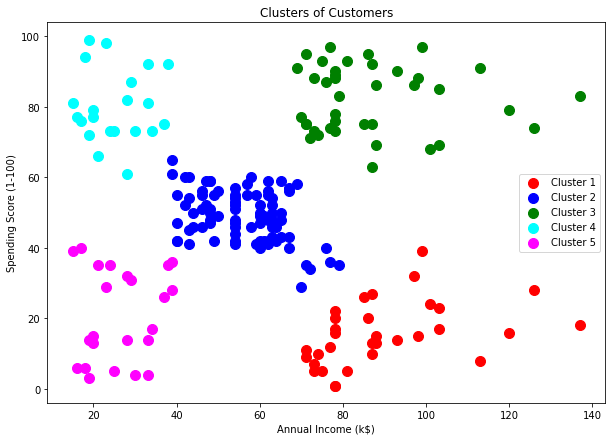

In [50]:
def plot_agglomerative_clusters(X, y_hc, title="Clusters of Customers", xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'):
  """
  Parameters:
  X (np.ndarray): The feature matrix for clustering.
  y_hc (np.ndarray): The cluster labels for each data point.
  title (str): The title of the plot.
  xlabel (str): The label for the x-axis.
  ylabel (str): The label for the y-axis.
  Purpose:
  Plots the data points colored by their cluster labels.
  Return:
  None
  """

  unique_labels = np.unique(y_hc)
  colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
  plt.figure(figsize=(10, 7))

  for i, label in enumerate(unique_labels):
      if i < len(colors):
          plt.scatter(X[y_hc == label, 0], X[y_hc == label, 1], s=100, c=colors[i], label=f'Cluster {label + 1}')
      else:
          plt.scatter(X[y_hc == label, 0], X[y_hc == label, 1], s=100, c='gray', label=f'Cluster {label + 1}')

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

plot_agglomerative_clusters(X, y_hc)